## Makemore

Current language model neural nets 
- Bigram 
- Bag of Words
- MLP
- RNN
- GRU 
- Transformer

2024. 07.15 makemore

Bigram : only work with just two characters at a time, only have the previous character to predict the next one

In [2]:
words = open("/home/sirius/PhD/Bioinformatics-Fileds/andre_dl/makemore/names.txt","r").read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# 1. python for loop two consecutive characters at a time sliding it through the world
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]): # pretty cute codes!
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [5]:
sorted(b.items(),key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch 

In [7]:
# number of alphabet = 26 + '<S>' + '<E>' = 28 
# simplify it to 26 + 1 = 27
N = torch.zeros((27,27),dtype=torch.int32) 

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [9]:
# train the bigram model
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # pretty cute codes!
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

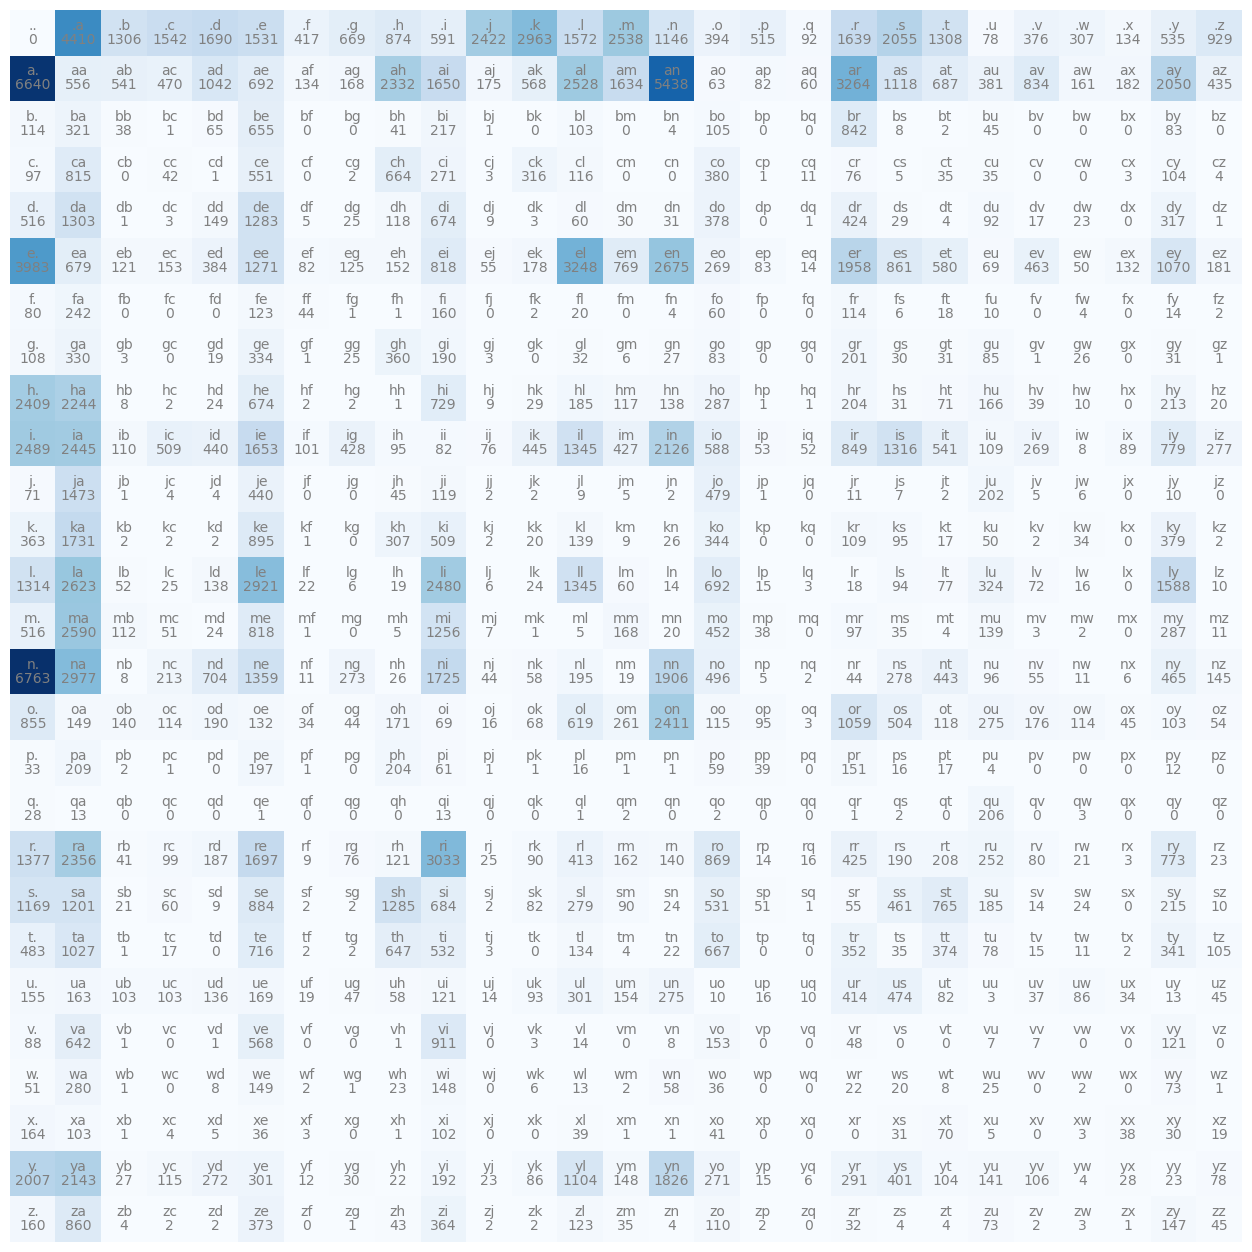

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')

In [31]:
# using generator object in pytorch to make random seed , make the sample process determinitstic 
g = torch.Generator().manual_seed(2147483647)
p = torch.ones(27)/27
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() #特别注意默认replacement=False,一般需要把replacement设置为True
itos[ix]

'j'

In [12]:
# 2. inference the bigram model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out[:-1]))

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias


In [13]:
# practice : normalize the rows of N
P = N.float()
P =  P / N.sum(dim=1,keepdim=True)
# broadcast允许的情况：1.将两个array按照右边对其，for loop每一个维度，两个array维度相同、或者其中一个维度为1、或者某一个array没有这个维度时，可以进行broadcast -> 输出的tensor为广播之后的形状 2.两个array至少有一个dimension

# P = P / P.sum(dim=1,keepdim=True)  正确的写法
# 27,27
# 27,1

# P = P / P.sum(dim=1)  错误的写法
# 27,27         -> 27,27 ->  27,27
# 27   右对其    ->   ,27 ->   1,27
# actually we are normalizing columns instead of rows

# andrej : treat this with respect, it's not something to play fast and loose with


In [161]:
# 如果不keepdim, 那么结果就是
(N / N.sum(dim=1)).sum(dim=1)

tensor([7.0225, 4.4142, 0.2009, 0.3717, 0.4146, 2.2968, 0.1063, 0.2065, 0.4567,
        2.3526, 0.2220, 0.3551, 1.0512, 0.4841, 1.3317, 1.1396, 0.1160, 0.0719,
        1.1012, 0.8395, 0.5237, 0.5898, 0.1441, 0.0669, 0.1164, 0.8289, 0.1753])

In [162]:
# 正确的写法，同时使用in-place operation避免copy一个新的tensor P
P = N.float()
P /= N.sum(dim=1,keepdim=True)

In [14]:
# 2. inference the bigram model

for i in range(50):
    output = []
    idx = stoi["."]
    while True:
        p = P[idx]
        # p = torch.ones(27) / 27 # just random sample
        idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        output.append(itos[idx])
        if idx == 0:
            break
    print(''.join(output[:-1]))

dedainrwieta
ssonielylarte
faveumerifontume
phynslenaruani
core
yaenon
ka
jabdinerimikimaynin
anaasn
ssorionsush
dgossmitan
il
le
pann
that
janreli
isa
dyn
rijelumemahaunayaleva
cararr
jen
janarta
maly
abely
a
i
lavadoni
themielyawat
f
modam
tavilitikiesaloeverin
n
e
kalbrenelah
anen
ch
k
jan
odridrdenanialilpergha
tezralelia
vymalelvan
hiahimahacelahmimi
rasabyoni
pe
aliaierenn
jayannda
r
ceremankesorannje
sanoman
kyn


In [30]:
# 3. evaluate the model / loss in the training loop
loglikelihood = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    prob_per_sample = 1
    for ch1,ch2 in zip(chs,chs[1:]): # pretty cute codes!
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        prob_per_sample *= prob
        loglikelihood += torch.log(prob)
        print(f"{ch1}{ch2}\t{prob:.4f}\t{logprob:.4f}")
    print(f"{w}\tlikelihood {prob_per_sample}\tlog-likelihood:{torch.log(prob_per_sample):.2f}")
print(f"TOTAL\tlikelihood\t{loglikelihood:.4f}")

# GOAL : maximize likelihood of the data w.r.t model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# P(X) -> P(X)=P(x1)P(x2)P(x3)
# log(P(X)) = log(P(x1)) + log(P(x2)) + log(P(x3))
# -log(P(X)) = -log(P(x1)) - log(P(x2)) - log(P(x3))
# -log(P(X)) / len(X) = (-log(P(x1)) - log(P(x2)) - log(P(x3)) / len(X)

.a	0.1377	-1.9829
an	0.1605	-1.8296
nd	0.0384	-3.2594
dr	0.0771	-2.5620
re	0.1336	-2.0127
ej	0.0027	-5.9171
jq	0.0000	-inf
q.	0.1029	-2.2736
andrejq	likelihood 0.0	log-likelihood:-inf
TOTAL	likelihood	-inf


In [38]:
# 4. model smoothing
# E.g. andrej -> andrejq , "jq" is zero percent likely
# add some fake counts
P = (N+1).float() # the more you add , the more uniform you have ; the less you add , more peak the distribution is
P /= P.sum(dim=1,keepdim=True)

loglikelihood = 0
n = 0

for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    prob_per_sample = 1
    for ch1,ch2 in zip(chs,chs[1:]): # pretty cute codes!
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        prob_per_sample *= prob
        loglikelihood += torch.log(prob)
        n += 1
        print(f"{ch1}{ch2}\t{prob:.4f}\t{logprob:.4f}")
    print(f"{w}\tlikelihood {prob_per_sample}\tlog-likelihood:{torch.log(prob_per_sample):.2f}")
print(f"TOTAL\tlikelihood\t{loglikelihood:.4f}\taverage log-likelihood\t{loglikelihood/n:.2f}")
nll = -loglikelihood 
print(f"negative log-likelihood\t{nll:.4f}\taverage negative log-likelihood\t{nll/n:.2f}")
# no longer zero percent likely, no infinity 

.a	0.1376	-1.9835
an	0.1604	-1.8302
nd	0.0384	-3.2594
dr	0.0770	-2.5646
re	0.1334	-2.0143
ej	0.0027	-5.9004
jq	0.0003	-7.9817
q.	0.0970	-2.3331
andrejq	likelihood 7.896267732558637e-13	log-likelihood:-27.87
TOTAL	likelihood	-27.8672	average log-likelihood	-3.48
negative log-likelihood	27.8672	average negative log-likelihood	3.48


In [ ]:
# 5. move this explicitly counts and normalizing bigram model into a neural network architecture
# bigram : input a single character and output a single character

In [39]:
# 5.1 create the training set of all the bigrams (x,y)
# train the bigram model
xs, ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]): # pretty cute codes!
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

# torch.tensor和torch.Tensor都可以创建相同的tensor, torch.tensor会保留原有的数据类型，而torch.Tensor会使用float32
# 因此对于语言模型的train和label而说，我们都需要使用tensor,因为这是int64

In [53]:
xs

tensor([ 0,  5, 13, 13,  1])

In [54]:
ys

tensor([ 5, 13, 13,  1,  0])

In [57]:
# 5.2 one-hot encoding 
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
xenc.shape

torch.Size([5, 27])

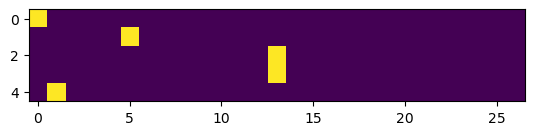

In [59]:
plt.imshow(xenc)

In [60]:
# 注意shape以及dtype，最终进入nn的数据类型一般最好要float number
xenc.dtype

torch.float32

In [76]:
# 5.3 one-hot encoding into a neural network
g = torch.Generator().manual_seed(777)
W = torch.randn((27,27),generator=g) # 代表一层神经网络,每个神经元对应27,1; 一次矩阵操作可以实现batch个数据并行通过一层线性层w(多个神经元)
logits = xenc @ W
# softmax operation
logits_exp = logits.exp()
probs = logits_exp / logits_exp.sum(dim=1,keepdim=True)

In [78]:
# 5.4 loss function is average negative log likelihood
# take batch size = 5 or think about only we have 5 training examples
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() # input character
    y = ys[i].item() # label character
    print(f'-------------')
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print(f"input to the neural net : {x}")
    print(f"logits : {probs[i]}")
    print(f"label : {y}")
    p = probs[i,y]
    print(f"probability of the label : {p.item()}")
    logp = torch.log(p)
    print(f"log probability : {logp.item()}")
    nll = -logp
    print(f"negative log likelihood : {nll.item()}")
    nlls[i] = nll

print(f"====================")
print(f"average negative log likelihood, i.e. loss= {nlls.mean().item()}")
# 目前ProteinMPNN给出的NLL score其实是loss,也就是average NLL score; ProGPT2给出的score是exp-average NLL score,也就是exp loss

-------------
bigram example 1: .e (indexes 0,5)
input to the neural net : 0
logits : tensor([0.0259, 0.0195, 0.0147, 0.0095, 0.1062, 0.0048, 0.0185, 0.0700, 0.0149,
        0.0684, 0.0551, 0.0123, 0.0795, 0.0052, 0.0043, 0.0199, 0.1716, 0.0464,
        0.1066, 0.0032, 0.0747, 0.0162, 0.0104, 0.0125, 0.0096, 0.0139, 0.0062])
label : 5
probability of the label : 0.004829296842217445
log probability : -5.333054542541504
negative log likelihood : 5.333054542541504
-------------
bigram example 2: em (indexes 5,13)
input to the neural net : 5
logits : tensor([0.0572, 0.1661, 0.0041, 0.0230, 0.0885, 0.0247, 0.0119, 0.0904, 0.0040,
        0.0325, 0.0233, 0.0324, 0.0201, 0.0185, 0.0474, 0.0119, 0.0119, 0.0256,
        0.0338, 0.0930, 0.0126, 0.0331, 0.0591, 0.0376, 0.0167, 0.0148, 0.0057])
label : 13
probability of the label : 0.0185326486825943
log probability : -3.9882214069366455
negative log likelihood : 3.9882214069366455
-------------
bigram example 3: mm (indexes 13,13)
input to the ne

In [93]:
# 5.5 vectorized loss ---------IMPORTANT

In [80]:
xs

tensor([ 0,  5, 13, 13,  1])

In [81]:
ys

tensor([ 5, 13, 13,  1,  0])

In [83]:
# naive的版本,for loop所有的数据
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0048),
 tensor(0.0185),
 tensor(0.2766),
 tensor(0.0168),
 tensor(0.0219))

In [92]:
# 将probs的两个索引进行合并，第一个索引是batch size，第二个索引是label 
loss = -probs[torch.arange(5),ys].log().mean() # vectorized loss expression, 之前都是使用Pytorch的nn.NLLLoss(log_probs,label)


loss_pytorch = torch.nn.NLLLoss()(torch.log(probs),ys) # 之前都是使用Pytorch的nn.NLLLoss(log_probs,label)
print(f"vectorized loss : {loss.item()}, pytorch loss : {loss_pytorch.item()}")

vectorized loss : 3.7022998332977295, pytorch loss : 3.7022998332977295


In [113]:
# 5.6 one-loop training
g = torch.Generator().manual_seed(777)
W = torch.randn((27,27),generator=g,requires_grad=True) # 代表一层神经网络,每个神经元对应27,1; 一次矩阵操作可以实现batch个数据并行通过一层线性层w(多个神经元)

In [124]:
# forward pass, simultaneously construct the computational graph
logits = xenc @ W
logits_exp = logits.exp()
probs = logits_exp / logits_exp.sum(dim=1,keepdim=True)
loss = -probs[torch.arange(5),ys].log().mean() # Advanced Indexing
print(loss.item())

3.6478633880615234


In [121]:
# backward pass
W.grad = None # Pytorch 设置gradient=0和=None都可以，=None更加高效
loss.backward() # backward pass form the output loss node to each leaf node with requires_grad=True

In [122]:
print(W.grad.shape)
print(W.data.shape)

torch.Size([27, 27])
torch.Size([27, 27])


In [123]:
W.data += -0.1 * W.grad # update

In [142]:
# 5.7 puting all the word together
xs,ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"number of bigram examples:{num}")

# initialize the 'network'
g = torch.Generator().manual_seed(777777)
W = torch.randn((27,27),generator=g,requires_grad=True)

number of bigram examples:228146


(-0.5, 26.5, 26.5, -0.5)

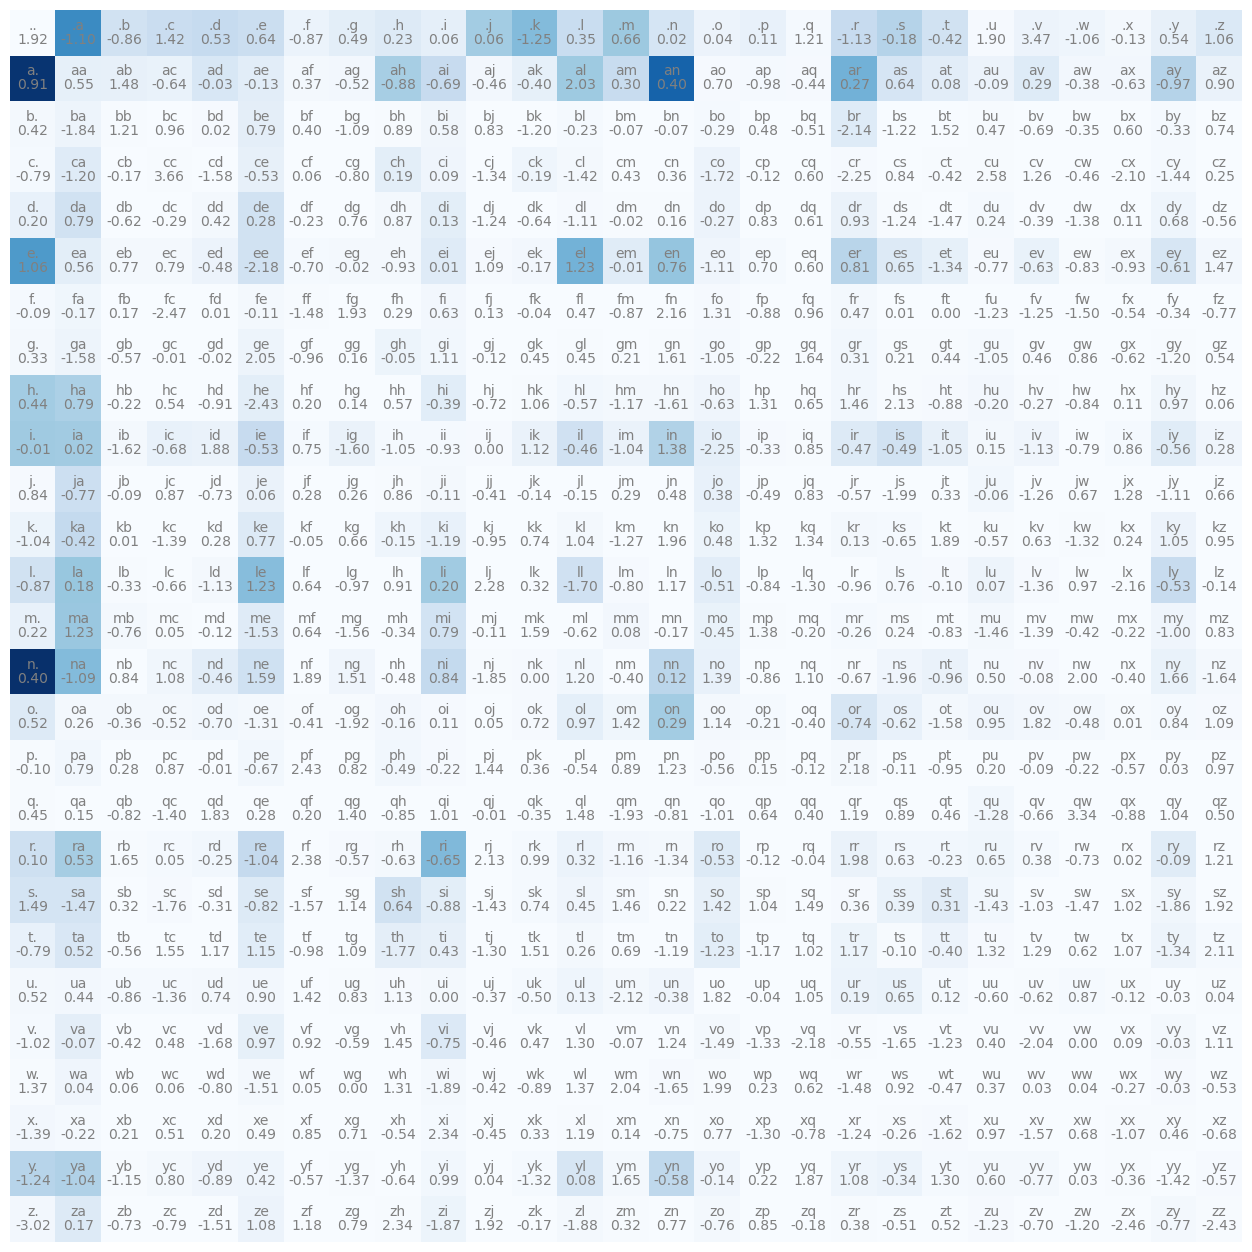

In [143]:
# inspect the parameters after training
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,f"{W[i,j].data.item() :.2f}",ha="center",va="top",color="gray")
plt.axis('off')

In [144]:
# gradient descent
# model training对标的NLL是counting模型的NLL Loss
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W # one-hot matrix multiplication is just row-ith indexing
    probs = logits.exp() / logits.exp().sum(dim=1,keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

# bigram虽然可以直接用count来计算，但是没办法拓展到n-gram, N-gram需要 size^N存储空间和统计 --- unscalable approach
# 而n-gram可以用神经网络直接实现,给神经网络更多的输入即可 --- scalable

3.782918930053711
3.3714969158172607
3.1605372428894043
3.026397466659546
2.9324772357940674
2.8638646602630615
2.8121495246887207
2.771883249282837
2.7395098209381104
2.712836265563965
2.6904711723327637
2.671463966369629
2.6551265716552734
2.640941858291626
2.628514289855957
2.617534875869751
2.6077632904052734
2.599008083343506
2.5911190509796143
2.583975076675415
2.577479362487793
2.571552038192749
2.5661256313323975
2.561145067214966
2.5565614700317383
2.552332878112793
2.5484230518341064
2.5447981357574463
2.5414302349090576
2.5382938385009766
2.535365581512451
2.532625675201416
2.5300562381744385
2.5276405811309814
2.5253653526306152
2.52321720123291
2.521186113357544
2.519260883331299
2.5174343585968018
2.515697956085205
2.514044761657715
2.5124692916870117
2.510965585708618
2.509528398513794
2.5081541538238525
2.506838321685791
2.5055770874023438
2.5043675899505615
2.503206253051758
2.5020904541015625
2.5010180473327637
2.499985933303833
2.4989922046661377
2.498034715652466
2.

(-0.5, 26.5, 26.5, -0.5)

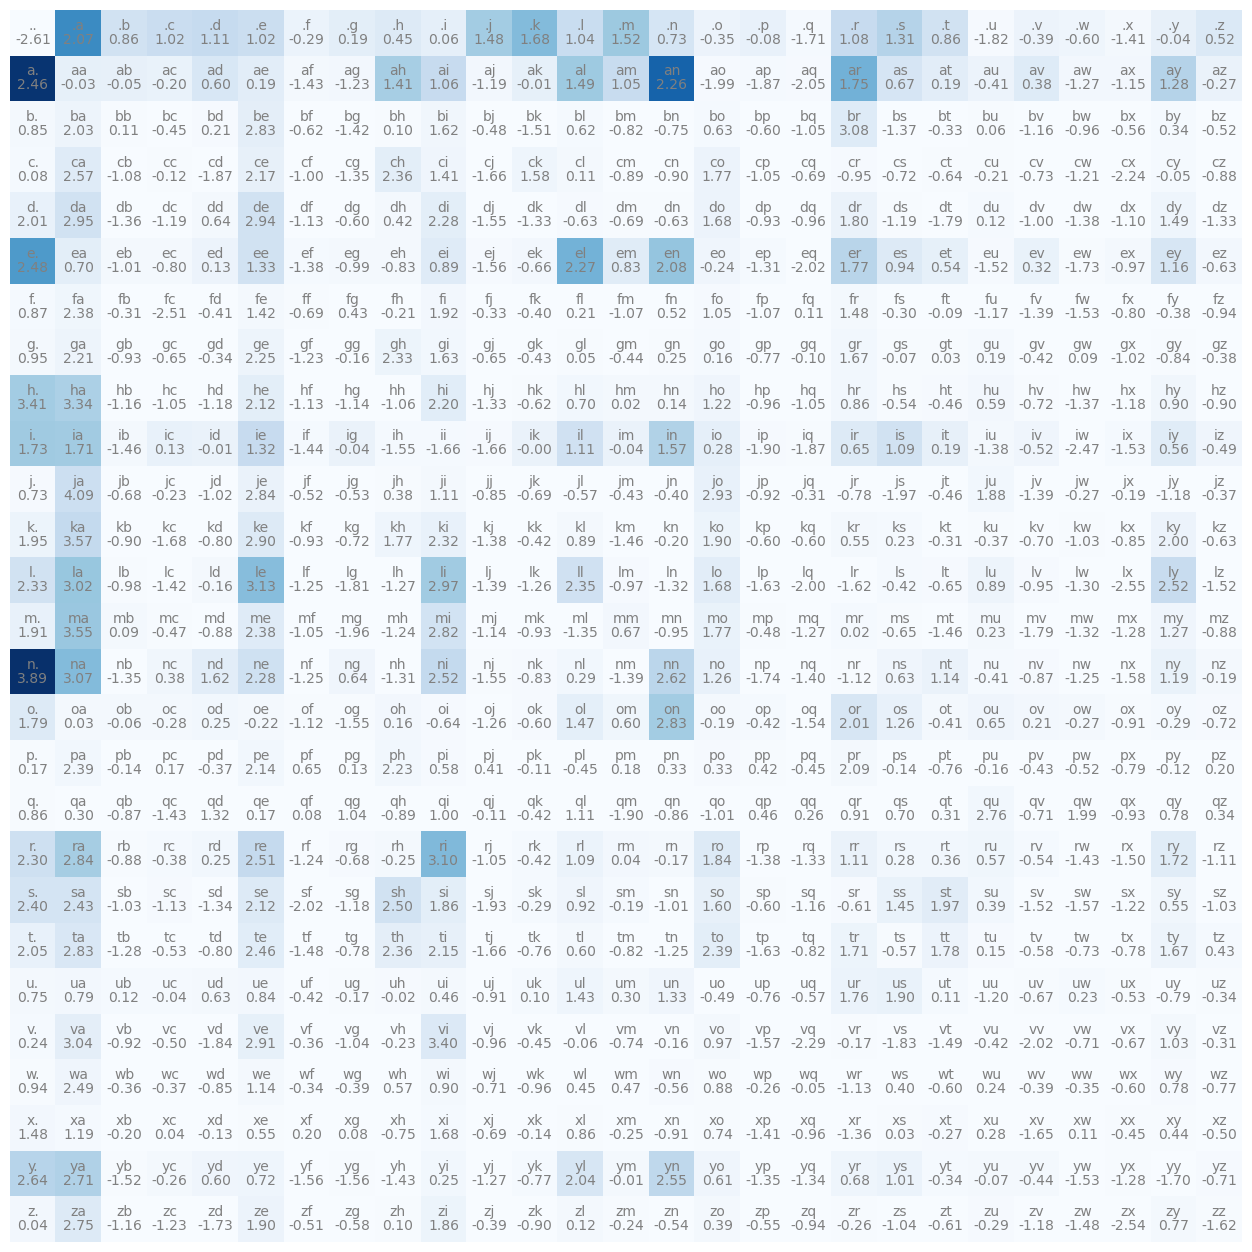

In [145]:
# inspect the parameters after training
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,f"{W[i,j].data.item() :.2f}",ha="center",va="top",color="gray")
plt.axis('off')

In [ ]:
# 5.8 model smoothing 
# in count and normalizing method
fake_counts = 1
P = (N+fake_counts).float()
P /= P.sum(dim=1,keepdim=True)

# If W is all zero, the output is all zero and softmax is uniform 
# try to incentivize W to be near zero is basically equlvalent label smoothing



In [147]:
# gradient descent
# model training对标的NLL是counting模型的NLL Loss
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = xenc @ W # one-hot matrix multiplication is just row-ith indexing
    probs = logits.exp() / logits.exp().sum(dim=1,keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad


# NLL保证模型学到了bigram概率分布
# regularization loss强迫模型向uniform模型靠拢

2.4909398555755615
2.490743637084961
2.490553855895996
2.4903697967529297
2.490191698074341
2.490017890930176
2.4898488521575928
2.4896841049194336
2.48952317237854
2.4893670082092285
2.4892139434814453
2.489065170288086
2.488920211791992
2.4887781143188477
2.4886395931243896
2.4885051250457764
2.488372802734375
2.488243818283081
2.4881181716918945
2.487995147705078
2.487874984741211
2.487757444381714
2.487643003463745
2.487530469894409


2.4874205589294434
2.4873135089874268
2.487208604812622
2.4871060848236084
2.4870059490203857
2.486907958984375
2.486811399459839
2.486717462539673
2.4866254329681396
2.4865353107452393
2.486447811126709
2.486361026763916
2.486276626586914
2.486194133758545
2.4861130714416504
2.4860336780548096
2.4859557151794434
2.4858791828155518
2.485804319381714
2.485731601715088
2.48565936088562
2.485589027404785
2.4855198860168457
2.485452651977539
2.4853861331939697
2.485320806503296
2.4852566719055176
2.485194206237793
2.4851326942443848
2.485071897506714
2.4850127696990967
2.484954833984375
2.4848976135253906
2.4848413467407227
2.48478627204895
2.4847323894500732
2.4846792221069336
2.4846270084381104
2.4845757484436035
2.484525203704834
2.484475612640381
2.484426975250244
2.484379291534424
2.4843318462371826
2.484286069869995
2.4842402935028076
2.4841957092285156
2.484151840209961
2.4841086864471436
2.4840660095214844
2.4840240478515625
2.483983039855957
2.4839425086975098
2.4839024543762207
2

In [152]:
# 5.9 sampling from the neuro nets

for i in range(50):
    output = []
    idx = stoi["."]
    while True:
        idx = torch.tensor([idx])
        xenc = F.one_hot(idx,num_classes=27).float()
        logits = xenc @ W # bigram one-hot matrix multiplication is just row-ith indexing ; only need to change for different models
        p = logits.exp() / logits.exp().sum(dim=1,keepdim=True)
        # p = torch.ones(27) / 27 # just random sample
        idx = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        output.append(itos[idx])
        if idx == 0:
            break
    print(''.join(output[:-1]))

talere
a
adollyanpniennion
ky
tahate
ka
m
rhanack
aylan
akom
clelyleykalekyme
as
ann
lel
cat
maulowhrisaun
jea
r
zkorda
cgr
jmio
zira
a
bunijoh
aril
moran
ji
mamas
tean
chetco
a
lary
shmaada
mawyhenendous
nniakaylmana
y
niam
dh
bellitisttonn
e
benn
ca
jovaudiamax
aha
nisut
rammcth
aman
vfirorah
el
dayaseeran


In [ ]:
# bigram : two asepcts , training/sample/evaluate 